# Exploring bodies

In [139]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
sns.set_theme(style="whitegrid", context="talk")
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
#load data
df = pd.read_csv("/Users/thearolskovsloth/data-science-x-am/output/body_descriptions.csv")
#df.head(20)
len(df)


466447

In [3]:
#lowercase all body parts
df["bodypart"] = df["bodypart"].str.lower()
len(df)


466447

In [4]:
#lemmatize all the bodyparts
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipes("ner", "parser")
nlp.max_length = 2568609

lemmas = df.bodypart.str.cat(sep=' ')
lemmas

lemmatized_bodyparts = nlp(lemmas)
len(lemmatized_bodyparts)

466447

In [5]:
#apply to all bodypart obs
lemmatized_body = [w.lemma_ for w in lemmatized_bodyparts]
len(lemmatized_body)


466447

In [6]:
#overwrite the bodypart column with the lemmatied bodyparts
df['bodypart'] = lemmatized_body
df.head(5)

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
0,0,hand,her,F,[],PG67640_text,F
1,1,lung,her,F,['left'],PG67640_text,F
2,2,face,her,F,[],PG67640_text,F
3,3,lung,his,M,[],PG67640_text,F
4,4,head,his,M,[],PG67640_text,F


In [7]:
#manual lemmatizing :)

df['bodypart'] = np.where(df['bodypart'] == "lips", "lip", df['bodypart'])
df.loc[df['bodypart'] == "lips"]

,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender


### splitting data into seperate datasets

In [8]:
#set the top x words to investigate
top = 50

In [9]:
#male authors
m_authors = df.loc[(df['author_gender']=="M")]

m_authors_total_bodycount = m_authors['bodypart'].value_counts().sum()



#select the top x bodypart mentions from the bodyparts column
top_m_authors = m_authors['bodypart'].value_counts()[:top].rename_axis('bodypart').reset_index(name='top_m_authors')

#to a list
top_m_authors_list = list(top_m_authors['bodypart'])

#the standardized measure for female authors: # of mentions of bodypart x / sum of all bodypart mentions for male owners
top_m_authors['std_male_authors'] = top_m_authors.apply (lambda row: (row.top_m_authors)/m_authors_total_bodycount, axis=1)


top_m_authors




,bodypart,top_m_authors,std_male_authors
0,eye,47361,0.137299
1,hand,47263,0.137015
2,head,35044,0.101592
3,face,32221,0.093408
4,arm,17827,0.051680
5,foot,15009,0.043511
6,heart,12835,0.037209
7,shoulder,11258,0.032637
8,lip,11141,0.032298
9,body,8423,0.024418


In [10]:
#female authors
f_authors = df.loc[(df['author_gender']=="F")]

f_authors_total_bodycount = f_authors['bodypart'].value_counts().sum()

#select the top x bodypart mentions from the bodyparts column
top_f_authors = f_authors['bodypart'].value_counts()[:top].rename_axis('bodypart').reset_index(name='top_f_authors')

#to list for later use
top_f_authors_list = list(top_f_authors['bodypart'])

#the standardized measure for female authors: # of mentions of bodypart x / sum of all bodypart mentions for male owners
top_f_authors['std_female_authors'] = top_f_authors.apply (lambda row: (row.top_f_authors)/f_authors_total_bodycount, axis=1)

top_f_authors



,bodypart,top_f_authors,std_female_authors
0,eye,18484,0.152133
1,hand,16935,0.139384
2,head,12703,0.104552
3,face,12333,0.101507
4,arm,6688,0.055046
5,heart,5108,0.042041
6,foot,4726,0.038897
7,shoulder,4103,0.033770
8,hair,3910,0.032181
9,lip,3679,0.030280


In [11]:

print("female authors' top bodyparts:", top_f_authors_list, "male authors' top bodyparts:", top_m_authors_list)

female authors' top bodyparts: ['eye', 'hand', 'head', 'face', 'arm', 'heart', 'foot', 'shoulder', 'hair', 'lip', 'finger', 'cheek', 'mouth', 'ear', 'knee', 'body', 'neck', 'back', 'throat', 'leg', 'smile', 'nose', 'forehead', 'breast', 'tooth', 'chin', 'brow', 'lap', 'brain', 'tongue', 'elbow', 'skin', 'wrist', 'waist', 'eyebrow', 'chest', 'fist', 'collar', 'feet', 'toe', 'curl', 'beard', 'palm', 'pupil', 'ankle', 'eyelid', 'stomach', 'thumb', 'bone', 'jaw'] male authors' top bodyparts: ['eye', 'hand', 'head', 'face', 'arm', 'foot', 'heart', 'shoulder', 'lip', 'body', 'hair', 'finger', 'mouth', 'ear', 'back', 'knee', 'cheek', 'leg', 'neck', 'throat', 'brain', 'nose', 'tooth', 'breast', 'forehead', 'brow', 'fist', 'tongue', 'chin', 'chest', 'smile', 'elbow', 'wrist', 'skin', 'lap', 'beard', 'waist', 'feet', 'jaw', 'stomach', 'pupil', 'eyebrow', 'teeth', 'toe', 'nostril', 'lung', 'palm', 'thumb', 'bone', 'ankle']


# BARPLOT of most frequent bodypart per author gender

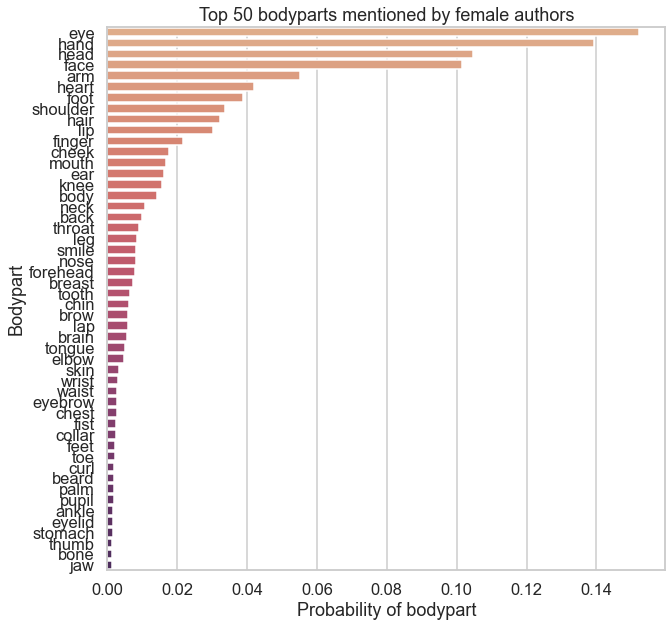

In [108]:
sns.barplot(x = 'std_female_authors',
            y = 'bodypart',
            data = top_f_authors,
            palette = "flare").set(title=f'Top {top} bodyparts mentioned by female authors',xlabel = "Probability of bodypart", ylabel = "Bodypart")
 
#sns.set(rc={'figure.figsize':(10,10)})
# Show the plot
plt.show()
#plt.savefig('females.png')

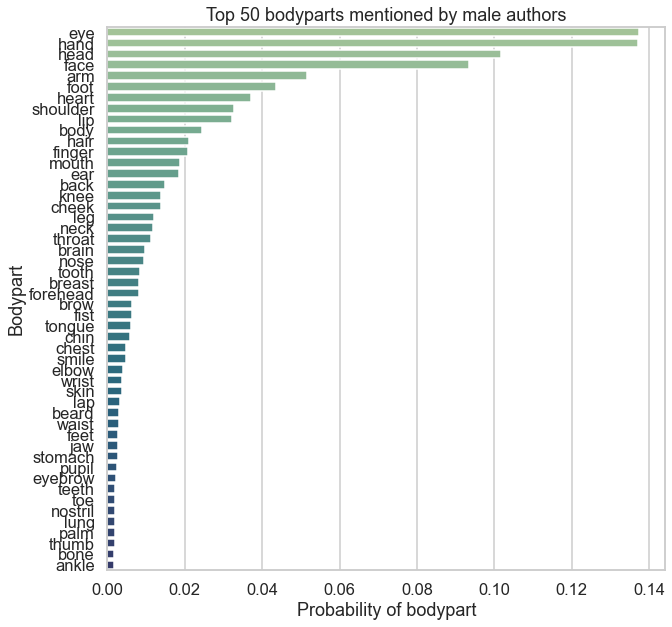

In [109]:
males_interesting = sns.barplot(x = 'std_male_authors',
            y = 'bodypart',
            data = top_m_authors,
            palette = "crest").set(title=f'Top {top} bodyparts mentioned by male authors',xlabel = "Probability of bodypart", ylabel = "Bodypart")

sns.set(rc={'figure.figsize':(10,10)})

# Show the plot
plt.show()
#plt.savefig('males.png')

In [88]:
interesting_bodyparts = ['eye', 'hand', 'face', 'arm', 'mouth', 'breast', 'heart', 'shoulder', 'lip', 'body', 'hair', 'neck', 'head', 'back', 'brain', 'nose', 'tooth', 'fist', 'tongue', 'chin', 'chest', 'forehead', 'skin', 'lap', 'waist', 'jaw', 'stomach', 'pupil', 'eyebrow', 'ankle']


## OWNER GENDER ANALYSIS

In [89]:
#FEMALE AUTHORS - 2 dataframes, 1 for each owner gender

##HER SPLITTES DET EFTER OWNER GENDER

#male owners
male_owners_female_authors = df.loc[(df['owner_gender']=="M") & (df['author_gender']=="F")]

#female owners
female_owners_female_authors = df.loc[(df['owner_gender']=="F") & (df['author_gender']=="F")]

len(male_owners_female_authors)

62691

In [90]:
#MALE AUTHORS - 2 dataframes, 1 for each owner gender

#male owners
male_owners_male_authors = df.loc[(df['owner_gender']=="M") & (df['author_gender']=="M")]

#female owners
female_owners_male_authors = df.loc[(df['owner_gender']=="F") & (df['author_gender']=="M")]

female_owners_male_authors.head()


,Unnamed: 0,bodypart,owner,owner_gender,description,ID,author_gender
18,18,eye,her,F,[],PG66460_text,M
37,37,body,Shelley,F,[],PG66460_text,M
39,39,face,My,F,[],PG66460_text,M
42,42,hair,her,F,['light'],PG66460_text,M
58,58,hair,My,F,[],PG66460_text,M


## female authors and bodiez

In [91]:
#FEMALE AUTHORS

#male_owners
male_owners_female_authors_counts = male_owners_female_authors['bodypart'].value_counts().rename_axis('bodypart').reset_index(name='counts_male_owners_female_authors')

#female_owners
female_owners_female_authors_counts = female_owners_female_authors['bodypart'].value_counts().rename_axis('bodypart').reset_index(name='counts_female_owners_female_authors')

#get totalt number of body mentions - female authors, male owners
total_male_owners_female_authors_count = male_owners_female_authors_counts['counts_male_owners_female_authors'].sum()

#get totalt number of body mentions - female authors, female owners
total_female_owners_female_authors_count = female_owners_female_authors_counts['counts_female_owners_female_authors'].sum()

print("total_male_owners_female_authors_count:", total_male_owners_female_authors_count, "total_female_owners_female_authors_count:",total_female_owners_female_authors_count)


total_male_owners_female_authors_count: 62691 total_female_owners_female_authors_count: 58808


In [92]:
#keep only the bodyparts that are in the top x female words list

#male owners
male_owners_female_authors_counts = male_owners_female_authors_counts[male_owners_female_authors_counts['bodypart'].isin(interesting_bodyparts)]

#female owners
female_owners_female_authors_counts = female_owners_female_authors_counts[female_owners_female_authors_counts['bodypart'].isin(interesting_bodyparts)]

female_owners_female_authors_counts.head()


,bodypart,counts_female_owners_female_authors
0,eye,9271
1,hand,8456
2,head,5907
3,face,5758
4,arm,2926


## male authors  and bodiez
## 

In [93]:
#MALE AUTHORS

#male_owners
male_owners_male_authors_counts = male_owners_male_authors['bodypart'].value_counts().rename_axis('bodypart').reset_index(name='counts_male_owners_male_authors')

#female_owners
female_owners_male_authors_counts = female_owners_male_authors['bodypart'].value_counts().rename_axis('bodypart').reset_index(name='counts_female_owners_male_authors')


#get totalt number of body mentions - female authors, male owners
total_male_owners_male_authors_count = male_owners_male_authors_counts['counts_male_owners_male_authors'].sum()

#get totalt number of body mentions - female authors, female owners
total_female_owners_male_authors_count = female_owners_male_authors_counts['counts_female_owners_male_authors'].sum()

print("total_male_owners_male_authors_count:", total_male_owners_male_authors_count, "total_female_owners_male_authors_count:",total_female_owners_male_authors_count)


total_male_owners_male_authors_count: 250020 total_female_owners_male_authors_count: 94928


In [94]:
#keep only the bodyparts that are in the top x male words list

#male_owners
male_owners_male_authors_counts = male_owners_male_authors_counts[male_owners_male_authors_counts['bodypart'].isin(interesting_bodyparts)]

#female_owners
female_owners_male_authors_counts = female_owners_male_authors_counts[female_owners_male_authors_counts['bodypart'].isin(interesting_bodyparts)]

len(female_owners_male_authors_counts)

30

### standardized measures

In [95]:
male_owners_male_authors_counts.head()

,bodypart,counts_male_owners_male_authors
0,hand,33842
1,eye,32270
2,head,26929
3,face,22760
4,arm,13075


In [96]:
#FEMALE AUTHORS

#the standardized measure for male owners: # of mentions of bodypart x / sum of all bodypart mentions for male owners
male_owners_female_authors_counts['std_male_owners_female_authors'] = male_owners_female_authors_counts.apply (lambda row: (row.counts_male_owners_female_authors)/total_male_owners_female_authors_count, axis=1)

#the standardized measure for female owners: # of mentions of bodypart x / sum of all bodypart mentions for female owners
female_owners_female_authors_counts['std_female_owners_female_authors'] = female_owners_female_authors_counts.apply (lambda row: (row.counts_female_owners_female_authors)/total_female_owners_female_authors_count, axis=1)

female_owners_female_authors_counts.head()

,bodypart,counts_female_owners_female_authors,std_female_owners_female_authors
0,eye,9271,0.157649
1,hand,8456,0.143790
2,head,5907,0.100446
3,face,5758,0.097912
4,arm,2926,0.049755


In [97]:
#MALE AUTHORS

#the standardized measure for male owners: # of mentions of bodypart x / sum of all bodypart mentions for male owners
male_owners_male_authors_counts['std_male_owners_male_authors'] = male_owners_male_authors_counts.apply (lambda row: (row.counts_male_owners_male_authors)/total_male_owners_male_authors_count, axis=1)

#the standardized measure for female owners: # of mentions of bodypart x / sum of all bodypart mentions for female owners
female_owners_male_authors_counts['std_female_owners_male_authors'] = female_owners_male_authors_counts.apply (lambda row: (row.counts_female_owners_male_authors)/total_female_owners_male_authors_count, axis=1)

male_owners_male_authors_counts.head()

,bodypart,counts_male_owners_male_authors,std_male_owners_male_authors
0,hand,33842,0.135357
1,eye,32270,0.129070
2,head,26929,0.107707
3,face,22760,0.091033
4,arm,13075,0.052296


### merge into female author df and male author df

In [98]:
female_authors = pd.merge(male_owners_female_authors_counts, female_owners_female_authors_counts, on=['bodypart'])

#female_authors = female_authors.drop(['counts_male_owners_female_authors', 'counts_female_owners_female_authors'], axis=1)

female_authors.head()

,bodypart,counts_male_owners_female_authors,std_male_owners_female_authors,counts_female_owners_female_authors,std_female_owners_female_authors
0,eye,9213,0.146959,9271,0.157649
1,hand,8479,0.135251,8456,0.143790
2,head,6796,0.108405,5907,0.100446
3,face,6575,0.104879,5758,0.097912
4,arm,3762,0.060009,2926,0.049755


In [99]:
male_authors = pd.merge(male_owners_male_authors_counts, female_owners_male_authors_counts, on=['bodypart'])

#male_authors = male_authors.drop(['counts_male_owners_male_authors', 'counts_female_owners_male_authors'], axis=1)

male_authors.head()

,bodypart,counts_male_owners_male_authors,std_male_owners_male_authors,counts_female_owners_male_authors,std_female_owners_male_authors
0,hand,33842,0.135357,13421,0.141381
1,eye,32270,0.129070,15091,0.158973
2,head,26929,0.107707,8115,0.085486
3,face,22760,0.091033,9461,0.099665
4,arm,13075,0.052296,4752,0.050059


In [100]:
print(interesting_bodyparts)

['eye', 'hand', 'face', 'arm', 'mouth', 'breast', 'heart', 'shoulder', 'lip', 'body', 'hair', 'neck', 'head', 'back', 'brain', 'nose', 'tooth', 'fist', 'tongue', 'chin', 'chest', 'forehead', 'skin', 'lap', 'waist', 'jaw', 'stomach', 'pupil', 'eyebrow', 'ankle']


In [101]:
male_authors

,bodypart,counts_male_owners_male_authors,std_male_owners_male_authors,counts_female_owners_male_authors,std_female_owners_male_authors
0,hand,33842,0.135357,13421,0.141381
1,eye,32270,0.129070,15091,0.158973
2,head,26929,0.107707,8115,0.085486
3,face,22760,0.091033,9461,0.099665
4,arm,13075,0.052296,4752,0.050059
5,shoulder,8435,0.033737,2823,0.029738
6,heart,8387,0.033545,4448,0.046857
7,lip,7288,0.029150,3853,0.040589
8,body,6059,0.024234,2364,0.024903
9,mouth,4948,0.019790,1535,0.016170


In [102]:
#sort alphabetically

male_authors= male_authors.sort_values(by = "bodypart", axis=0, ascending=True)
male_authors

#FEMALE AUTHORS
female_authors= female_authors.sort_values(by = "bodypart", axis=0, ascending=True)
female_authors


,bodypart,counts_male_owners_female_authors,std_male_owners_female_authors,counts_female_owners_female_authors,std_female_owners_female_authors
29,ankle,80,0.001276,124,0.002109
4,arm,3762,0.060009,2926,0.049755
10,back,1035,0.016510,187,0.003180
11,body,940,0.014994,778,0.013229
17,brain,357,0.005695,334,0.005679
16,breast,416,0.006636,462,0.007856
20,chest,246,0.003924,74,0.001258
18,chin,351,0.005599,398,0.006768
0,eye,9213,0.146959,9271,0.157649
23,eyebrow,170,0.002712,169,0.002874


In [103]:
male_authors['skewness_male_authors'] = np.where(male_authors['std_male_owners_male_authors'] > male_authors['std_female_owners_male_authors'], ((male_authors['std_male_owners_male_authors'])/(male_authors['std_female_owners_male_authors'])), ((-male_authors['std_female_owners_male_authors'])/male_authors['std_male_owners_male_authors']))

male_authors['n'] = range(len(male_authors))
male_authors['skew_direction'] = np.where(male_authors['skewness_male_authors'] > 0, "male_skew", "female_skew")

#male_authors['abs_skew_male_authors'] = abs(male_authors['skewness_male_authors'])

male_authors.tail()

,bodypart,counts_male_owners_male_authors,std_male_owners_male_authors,counts_female_owners_male_authors,std_female_owners_male_authors,skewness_male_authors,n,skew_direction
22,skin,888,0.003552,381,0.004014,-1.130036,25,female_skew
24,stomach,818,0.003272,113,0.001190,2.748492,26,male_skew
19,tongue,1587,0.006347,492,0.005183,1.224705,27,male_skew
15,tooth,2368,0.009471,516,0.005436,1.742415,28,male_skew
27,waist,492,0.001968,509,0.005362,-2.724790,29,female_skew


In [104]:
female_authors['skewness_female_authors'] = np.where(female_authors['std_male_owners_female_authors'] > female_authors['std_female_owners_female_authors'], ((female_authors['std_male_owners_female_authors'])/(female_authors['std_female_owners_female_authors'])), ((-female_authors['std_female_owners_female_authors'])/female_authors['std_male_owners_female_authors']))
female_authors['n'] = range(len(female_authors))

female_authors['skew_direction'] = np.where(female_authors['skewness_female_authors'] > 0, "male_skew", "female_skew")
female_authors['abs_skew_female_authors'] = abs(female_authors['skewness_female_authors'])

female_authors


,bodypart,counts_male_owners_female_authors,std_male_owners_female_authors,counts_female_owners_female_authors,std_female_owners_female_authors,skewness_female_authors,n,skew_direction,abs_skew_female_authors
29,ankle,80,0.001276,124,0.002109,-1.652344,0,female_skew,1.652344
4,arm,3762,0.060009,2926,0.049755,1.206079,1,male_skew,1.206079
10,back,1035,0.016510,187,0.003180,5.191943,2,male_skew,5.191943
11,body,940,0.014994,778,0.013229,1.133390,3,male_skew,1.133390
17,brain,357,0.005695,334,0.005679,1.002658,4,male_skew,1.002658
16,breast,416,0.006636,462,0.007856,-1.183907,5,female_skew,1.183907
20,chest,246,0.003924,74,0.001258,3.118420,6,male_skew,3.118420
18,chin,351,0.005599,398,0.006768,-1.208773,7,female_skew,1.208773
0,eye,9213,0.146959,9271,0.157649,-1.072740,8,female_skew,1.072740
23,eyebrow,170,0.002712,169,0.002874,-1.059758,9,female_skew,1.059758


In [105]:
x = list(male_authors['skewness_male_authors'])+list(female_authors['skewness_female_authors'])
len(x)


60

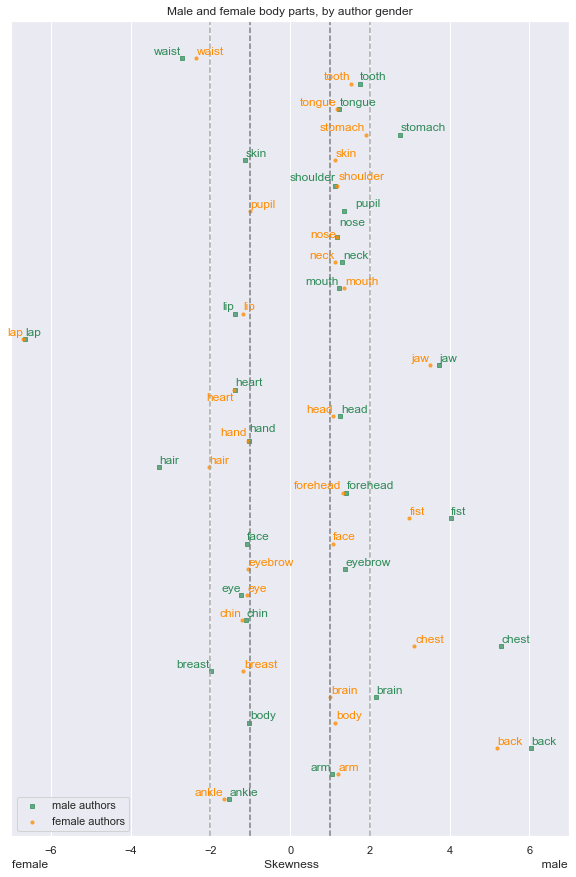

In [138]:

x = list(male_authors['skewness_male_authors'])+list(female_authors['skewness_female_authors'])
y = list(range(0,30))+list(range(0,30))
fig = plt.figure()
ax1 = fig.add_subplot(111)
#fig, ax = plt.subplots()

ax1.scatter(x[:30], y[:30], s=10, c='seagreen', marker="s", label='male authors', alpha = 0.7)
ax1.scatter(x[30:],y[30:], s=10, c='darkorange', marker="o", label='female authors', alpha = 0.7)


texts = []

for i, txt in enumerate(male_authors.bodypart):
    texts.append(ax1.annotate(txt, (male_authors.skewness_male_authors.iat[i],male_authors.n.iat[i]), color = "seagreen"))
for i, txt in enumerate(female_authors.bodypart):
    texts.append(ax1.annotate(txt, (female_authors.skewness_female_authors.iat[i],female_authors.n.iat[i]), color = "darkorange"))
    
adjust_text(texts)


#plt.axvline(0, ls = "--", color="black")
plt.axvline(1, ls = "--", color="grey")
plt.axvline(-1, ls = "--", color="grey")
plt.axvline(2, ls = "--", color="darkgrey")
plt.axvline(-2, ls = "--", color="darkgrey")
plt.legend(loc='lower left');
plt.title('Male and female body parts, by author gender')
plt.xlabel('female                                                                Skewness                                                                  male')
ax1.yaxis.set_visible(False)
plt.xlim(-7,7)
fig.set_figheight(15)
fig.set_figwidth(10)
plt.savefig('skewness.png')



In [23]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    female_authors['abs_skew_female_authors'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
print(circlify.bubbles)


<function bubbles at 0x7fdb3281c160>


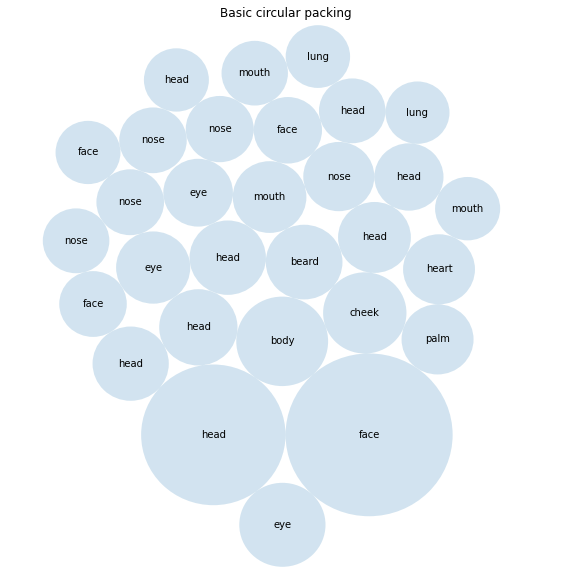

In [25]:
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = df['bodypart']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

# analysis of adjectives

In [ ]:
#which bodyparts do different author genders describe?

In [ ]:
############## spørgsmål: hvad med dem der har flere descriptions i samme celle, bliver de talt med?

#the length of the description columns elements, if the list is empty
print(len(female_owners_male_authors.iloc[1,4]))

2


In [328]:
top100males = described_male_bodyparts['description'].value_counts()[:top].rename_axis('descriptive').reset_index(name='counts_male')
top100males = pd.DataFrame (top100males)

top100males.head()

,descriptive,counts_male
0,['own'],2597
1,['right'],2147
2,['left'],1907
3,['long'],696
4,['white'],573


In [329]:
top100females = described_female_bodyparts['description'].value_counts()[:top].rename_axis('descriptive').reset_index(name='counts_female')
top100females = pd.DataFrame (top100females)
print(top100females.iloc[1,1])
top100females.head()

661


,descriptive,counts_female
0,['own'],981
1,['white'],661
2,['dark'],528
3,['little'],476
4,['brown'],414


In [330]:
#merge
adjectives = pd.merge(top100females, top100males, on=['descriptive'])
adjectives.tail()

,descriptive,counts_female,counts_male
9,['bare'],318,419
10,['red'],261,363
11,['whole'],212,400
12,['long'],194,696
13,['thin'],187,402


In [170]:
#skal standardiseres
import numpy as np 
import matplotlib.pyplot as plt 
import re

X = list(adjectives['descriptive'])
Ygirls = list(adjectives['counts_female'])
Zboys = list(adjectives['counts_male'])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X,rotation=90)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

NameError: name 'adjectives' is not defined

In [125]:
#prepare file
word_list_female = []
word_list_male = []
def repeat(word, n):
    
    repeat_word = word[:]
    result = ""

    for i in range(n):
        result = result + " " + repeat_word

    word_list_male.append(result)

for w in range(1,len(top100females)):
    stripped_w = re.sub(r'[^a-zA-Z]', '', str(top100females.iloc[w,0]))
    repeat(stripped_w, top100females.iloc[w,1])

words_male=' '.join(map(str,word_list_male))
words_female=' '.join(map(str,word_list_female))


In [132]:
words_male= words_male.replace(' ', ',')
words_male

',white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,white,wh

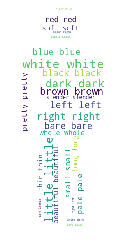

In [134]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

mask_male = np.array(Image.open(r'/Users/thearolskovsloth/Downloads/male.jpg'))

male_cloud = WordCloud(stopwords = STOPWORDS,
               mask = mask_male, background_color = "white",
               max_words = 50, max_font_size = 500,
               random_state = 42, width = mask_male.shape[1],
               height = mask_male.shape[0])

male_cloud.generate(words_male)
plt.imshow(male_cloud, interpolation="None")
plt.axis('off')
plt.show()

In [ ]:
mask_female = np.array(Image.open(r'/Users/thearolskovsloth/Downloads/female.jpg'))